In [64]:
import pandas as pd
import matplotlib.pyplot as plt

dic = {'Nome': ["Thomas", "Brooke", "Ricardo", "Fernanda", "Ben"],
       'Sobrenome': ["Andrew", "Batista", "Batista", "Souza", "Batista"],
       "Idade": [27, 25, 56, 52, 6],
       "Comida Favorita": ["Tudo", "Chocolate", "Sorvete", "Chocolate", "Morango"]
       }

dicDF = pd.DataFrame.from_dict(dic)
dicDF.head()

,Nome,Sobrenome,Idade,Comida Favorita
0,Thomas,Andrew,27,Tudo
1,Brooke,Batista,25,Chocolate
2,Ricardo,Batista,56,Sorvete
3,Fernanda,Souza,52,Chocolate
4,Ben,Batista,6,Morango


In [65]:
dicDF.Nome

0      Thomas
1      Brooke
2     Ricardo
3    Fernanda
4         Ben
Name: Nome, dtype: object

In [66]:
dicDF.loc()[1]

Nome                  Brooke
Sobrenome            Batista
Idade                     25
Comida Favorita    Chocolate
Name: 1, dtype: object

In [67]:
dicDF.columns

Index(['Nome', 'Sobrenome', 'Idade', 'Comida Favorita'], dtype='object')

In [68]:
dicDF.groupby('Sobrenome').count()

,Nome,Idade,Comida Favorita
Sobrenome,,,
Andrew,1,1,1
Batista,3,3,3
Souza,1,1,1


In [69]:
dicDF.groupby('Idade').max()

,Nome,Sobrenome,Comida Favorita
Idade,,,
6,Ben,Batista,Morango
25,Brooke,Batista,Chocolate
27,Thomas,Andrew,Tudo
52,Fernanda,Souza,Chocolate
56,Ricardo,Batista,Sorvete


In [70]:
dicDF.groupby('Idade').min()

,Nome,Sobrenome,Comida Favorita
Idade,,,
6,Ben,Batista,Morango
25,Brooke,Batista,Chocolate
27,Thomas,Andrew,Tudo
52,Fernanda,Souza,Chocolate
56,Ricardo,Batista,Sorvete


In [71]:
dicDF.shape

(5, 4)

In [72]:
dicDF.Idade.max()

56

In [73]:
dicDF.Idade.idxmax()

2

In [74]:
dicDF.Idade.loc()[2]

56

In [75]:
dicDF.Idade[2]

56

In [76]:
dicDF.loc()[2]

Nome               Ricardo
Sobrenome          Batista
Idade                   56
Comida Favorita    Sorvete
Name: 2, dtype: object

In [77]:
dicDF.head()

,Nome,Sobrenome,Idade,Comida Favorita
0,Thomas,Andrew,27,Tudo
1,Brooke,Batista,25,Chocolate
2,Ricardo,Batista,56,Sorvete
3,Fernanda,Souza,52,Chocolate
4,Ben,Batista,6,Morango


In [78]:
class Familia:
  def __init__(self, nome, sobrenome, idade, comida_favorita):
    self.nome = nome
    self.sobrenome = sobrenome
    self.idade = idade
    self.comida_favorita = comida_favorita

  def func(self):
    if self.nome == "Thomas" and self.idade == 27:
      print(dicDF.loc()[0])

familia = Familia(dicDF.Nome[0], dicDF.Sobrenome[0], dicDF.Idade[0], dicDF['Comida Favorita'][0])
familia.func()

Nome               Thomas
Sobrenome          Andrew
Idade                  27
Comida Favorita      Tudo
Name: 0, dtype: object


In [79]:
dicDF.head()

,Nome,Sobrenome,Idade,Comida Favorita
0,Thomas,Andrew,27,Tudo
1,Brooke,Batista,25,Chocolate
2,Ricardo,Batista,56,Sorvete
3,Fernanda,Souza,52,Chocolate
4,Ben,Batista,6,Morango


In [80]:
class NovaColuna(Familia):
  def __init__(self, esporte_favorito):
    self.esporte_favorito = esporte_favorito

  def inserir(self):
    dicDF.insert(4, self.esporte_favorito, ["basketball", "Soccer", "Skate", "Parkour", "Tricking"])

novaColuna = NovaColuna("Esporte Favorito")
novaColuna.inserir()

In [81]:
dicDF.head()

,Nome,Sobrenome,Idade,Comida Favorita,Esporte Favorito
0,Thomas,Andrew,27,Tudo,basketball
1,Brooke,Batista,25,Chocolate,Soccer
2,Ricardo,Batista,56,Sorvete,Skate
3,Fernanda,Souza,52,Chocolate,Parkour
4,Ben,Batista,6,Morango,Tricking


In [109]:
dicDF.insert(5, "Ano de Nascimento", [1996, 1998, 1969, 1972, 2017])

In [111]:
dicDF.head()

,Nome,Sobrenome,Idade,Comida Favorita,Esporte Favorito,Ano de Nascimento
0,Thomas,Andrew,27,Tudo,basketball,1996
1,Brooke,Batista,25,Chocolate,Soccer,1998
2,Ricardo,Batista,56,Sorvete,Skate,1969
3,Fernanda,Souza,52,Chocolate,Parkour,1972
4,Ben,Batista,6,Morango,Tricking,2017


In [112]:
newDict = dicDF.pivot(index="Ano de Nascimento", columns="Nome", values="Comida Favorita")
newDict.head()

Nome,Ben,Brooke,Fernanda,Ricardo,Thomas
Ano de Nascimento,,,,,
1969,NaN,NaN,NaN,Sorvete,NaN
1972,NaN,NaN,Chocolate,NaN,NaN
1996,NaN,NaN,NaN,NaN,Tudo
1998,NaN,Chocolate,NaN,NaN,NaN
2017,Morango,NaN,NaN,NaN,NaN


In [122]:
newDict.fillna(0, inplace=True)
newDict.head()

Nome,Ben,Brooke,Fernanda,Ricardo,Thomas
Ano de Nascimento,,,,,
1969,0,0,0,Sorvete,0
1972,0,0,Chocolate,0,0
1996,0,0,0,0,Tudo
1998,0,Chocolate,0,0,0
2017,Morango,0,0,0,0


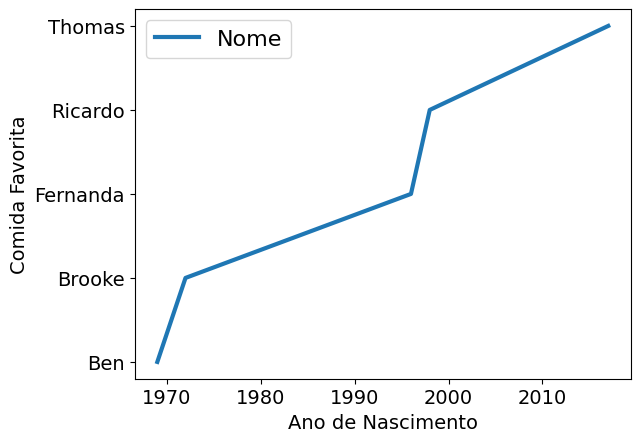

In [151]:
# At least it was better than before

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Comida Favorita', fontsize=14)
plt.xlabel('Ano de Nascimento', fontsize=14)
plt.plot(newDict.index, newDict.columns ,linewidth=3, label=newDict.columns.name)
plt.legend(fontsize=16)